# Basic machine learning with scikit-learn

## Machine learning terminology

- Each row is an **observation** (also known as: sample, example, instance, record)
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate)

## Option 1: Load and clean data

In [1]:
pwd

'/Users/cayruachavesfonseca/Dropbox/CEMFI_TA/css2020/CSS_2020_cay/Basic Python - Tutorials-20200903/tutorial_3'

In [2]:
import pandas as pd
df = pd.read_csv('LoanStats3a.csv',skiprows=1,low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


For the sake of out example we will only consider

- **Target:** whether the loan was paid back 
- **Features:** interest rate, loan amount, borrower's income and grade

In [3]:
clist = ['loan_status','int_rate','loan_amnt', 'annual_inc','grade']
df = df[clist]
df.head()

,loan_status,int_rate,loan_amnt,annual_inc,grade
0,Fully Paid,10.65%,5000.0,24000.0,B
1,Charged Off,15.27%,2500.0,30000.0,C
2,Fully Paid,15.96%,2400.0,12252.0,C
3,Fully Paid,13.49%,10000.0,49200.0,C
4,Fully Paid,12.69%,3000.0,80000.0,B


#### Missing data
Drop rows if data loss is small and not worried about selection

Use dummies for missing variables otherwise

In [4]:
print(df.count())

loan_status    42535
int_rate       42535
loan_amnt      42535
annual_inc     42531
grade          42535
dtype: int64


The variable income has 4 missing values

It seems better to drop 4 observations than to drop the the variable **income**.

In [5]:
df = df.dropna()
print(df.count())

loan_status    42531
int_rate       42531
loan_amnt      42531
annual_inc     42531
grade          42531
dtype: int64


#### Formatting

**Interest rate:** has the percentage sign and it stored as text because of that.

In [6]:
# apply function that transforms the argument's % sign into a empty space 
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace('%',''))
df.head()

,loan_status,int_rate,loan_amnt,annual_inc,grade
0,Fully Paid,10.65,5000.0,24000.0,B
1,Charged Off,15.27,2500.0,30000.0,C
2,Fully Paid,15.96,2400.0,12252.0,C
3,Fully Paid,13.49,10000.0,49200.0,C
4,Fully Paid,12.69,3000.0,80000.0,B


In [7]:
# apply function that transforms into number 
df['int_rate'] = df['int_rate'].astype('float')
df.head()

,loan_status,int_rate,loan_amnt,annual_inc,grade
0,Fully Paid,10.65,5000.0,24000.0,B
1,Charged Off,15.27,2500.0,30000.0,C
2,Fully Paid,15.96,2400.0,12252.0,C
3,Fully Paid,13.49,10000.0,49200.0,C
4,Fully Paid,12.69,3000.0,80000.0,B


In [8]:
df['int_rate'].dtype

dtype('float64')

#### Categories

Use dummies for all categorical variables

In [9]:
grade_dummies = pd.get_dummies(df['grade'],prefix='grade')
grade_dummies.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [10]:
df = df.drop(columns=['grade'])

In [11]:
df.head()

,loan_status,int_rate,loan_amnt,annual_inc
0,Fully Paid,10.65,5000.0,24000.0
1,Charged Off,15.27,2500.0,30000.0
2,Fully Paid,15.96,2400.0,12252.0
3,Fully Paid,13.49,10000.0,49200.0
4,Fully Paid,12.69,3000.0,80000.0


In [12]:
grade_dummies.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [13]:
df = df.join(grade_dummies)
df.head()

,loan_status,int_rate,loan_amnt,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,Fully Paid,10.65,5000.0,24000.0,0,1,0,0,0,0,0
1,Charged Off,15.27,2500.0,30000.0,0,0,1,0,0,0,0
2,Fully Paid,15.96,2400.0,12252.0,0,0,1,0,0,0,0
3,Fully Paid,13.49,10000.0,49200.0,0,0,1,0,0,0,0
4,Fully Paid,12.69,3000.0,80000.0,0,1,0,0,0,0,0


Now we need to transform our target in numbers

In [14]:
# what values are there?
df['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1984
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [15]:
# the newly created default will hold 0 if the string 'Fully paid' is present in the loan status feature
df['default'] = df['loan_status'].apply(lambda x: 
                                        0 if 'Fully Paid' in str(x) else 1).astype('uint8')

In [16]:
df['default'].value_counts()

0    36100
1     6431
Name: default, dtype: int64

In [17]:
# adding information on meet credit policy or not
df['meet_policy'] = df['loan_status'].apply(lambda x: 
                                        0 if 'Does not meet the credit policy' in str(x) 
                                            else 1).astype('uint8')

In [18]:
# I don't need loan status in strings anymore
df = df.drop(columns = ['loan_status'])
df.head()

,int_rate,loan_amnt,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,default,meet_policy
0,10.65,5000.0,24000.0,0,1,0,0,0,0,0,0,1
1,15.27,2500.0,30000.0,0,0,1,0,0,0,0,1,1
2,15.96,2400.0,12252.0,0,0,1,0,0,0,0,0,1
3,13.49,10000.0,49200.0,0,0,1,0,0,0,0,0,1
4,12.69,3000.0,80000.0,0,1,0,0,0,0,0,0,1


In [19]:
# reorder
df = df[['default','loan_amnt','int_rate','annual_inc',
         'grade_A','grade_B','grade_C','grade_D','grade_E','grade_F',
         'grade_G','meet_policy']]
df.head()

,default,loan_amnt,int_rate,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,meet_policy
0,0,5000.0,10.65,24000.0,0,1,0,0,0,0,0,1
1,1,2500.0,15.27,30000.0,0,0,1,0,0,0,0,1
2,0,2400.0,15.96,12252.0,0,0,1,0,0,0,0,1
3,0,10000.0,13.49,49200.0,0,0,1,0,0,0,0,1
4,0,3000.0,12.69,80000.0,0,1,0,0,0,0,0,1


In [20]:
# nices format for displaying
pd.options.display.float_format = '{:,.4f}'.format

#summary
df.describe()

,default,loan_amnt,int_rate,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,meet_policy
count,"42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000","42,531.0000"
mean,0.1512,"11,090.1731",12.1654,"69,136.5564",0.2393,0.2913,0.2055,0.1414,0.0798,0.0306,0.0120,0.9355
std,0.3583,"7,411.1375",3.7079,"64,096.3497",0.4267,0.4544,0.4041,0.3485,0.2710,0.1722,0.1091,0.2457
min,0.0000,500.0000,5.4200,"1,896.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,"5,200.0000",9.6300,"40,000.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
50%,0.0000,"9,700.0000",11.9900,"59,000.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,0.0000,"15,000.0000",14.7200,"82,500.0000",0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,"35,000.0000",24.5900,"6,000,000.0000",1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [21]:
df.shape

(42531, 12)

What do we get?

- 42531 **observations**
- **Response** variable is the default status (1 or 0)
- 11 possible **features**
- **Classification** problem since response is categorical

## A machine learning model to predict weather a borrower would default

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Receives a features of an *unknown* loan.
3. Search for the K observations in the training data that are "nearest" to the unknown loan in terms of its feature values (euclidean distance is the most popular).
4. Store the default value for the K nearest neighbors found in the previous step.  
5. Use the most frequent target value among the K nearest neighbors as the predicted response value for the unknown loan.

**Note:** In the case of ties, the prediction will depend on the package you use (randomly choose one of the options, the class that happens to appear first in the set of neighbors...)

### Example training data

![Training data](knn_dataset.png)

## Preparing X and y

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

### Data Normalization

For better results using the **KNN model**, normalizing data on the same scale is highly recommended. 

##### Two ways to make features comparable:
1. Data Normalization: refers to rescaling real valued numeric attributes into the range 0 and 1 (useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors).
2. Data Standardization: subtracting each observation by the mean and dividing by the standard deviation (useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes). 

I will add to the **dataframe** variables of loan amount, interest rate, and income both normalized and standardized.

The remaining variables are dummies (grade and meet policy) and I leave them in the data just in case you modify the code and check what happens if we include them in the model.

### 1. Normalization

In [22]:
cols = ['loan_amnt','int_rate','annual_inc']
for col in cols:
    new_col = col+'_norm'
    df.loc[:,new_col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df.tail()
#scroll to the right and you'll the new variables created

,default,loan_amnt,int_rate,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,meet_policy,loan_amnt_norm,int_rate_norm,annual_inc_norm
42532,1,"6,500.0000",9.6400,"20,000.0000",0,1,0,0,0,0,0,0,0.1739,0.2201,0.0030
42533,0,"3,500.0000",10.2800,"180,000.0000",0,0,1,0,0,0,0,0,0.0870,0.2535,0.0297
42534,0,"1,000.0000",9.6400,"12,000.0000",0,1,0,0,0,0,0,0,0.0145,0.2201,0.0017
42535,0,"2,525.0000",9.3300,"110,000.0000",0,1,0,0,0,0,0,0,0.0587,0.2040,0.0180
42537,0,"5,000.0000",7.7500,"70,000.0000",1,0,0,0,0,0,0,0,0.1304,0.1215,0.0114


### 2. Standardization

In [23]:
cols = ['loan_amnt','int_rate','annual_inc']
for col in cols:
    new_col = col+'_std'
    df.loc[:,new_col] = (df[col] - df[col].mean()) / df[col].std()
df.tail()
#scroll to the right and you'll the new variables created

,default,loan_amnt,int_rate,annual_inc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,meet_policy,loan_amnt_norm,int_rate_norm,annual_inc_norm,loan_amnt_std,int_rate_std,annual_inc_std
42532,1,"6,500.0000",9.6400,"20,000.0000",0,1,0,0,0,0,0,0,0.1739,0.2201,0.0030,-0.6194,-0.6811,-0.7666
42533,0,"3,500.0000",10.2800,"180,000.0000",0,0,1,0,0,0,0,0,0.0870,0.2535,0.0297,-1.0242,-0.5085,1.7296
42534,0,"1,000.0000",9.6400,"12,000.0000",0,1,0,0,0,0,0,0,0.0145,0.2201,0.0017,-1.3615,-0.6811,-0.8914
42535,0,"2,525.0000",9.3300,"110,000.0000",0,1,0,0,0,0,0,0,0.0587,0.2040,0.0180,-1.1557,-0.7647,0.6375
42537,0,"5,000.0000",7.7500,"70,000.0000",1,0,0,0,0,0,0,0,0.1304,0.1215,0.0114,-0.8218,-1.1908,0.0135


Now that we have all we need in the data, let's move on to implementing the KNN model using scikit

# Scikit-learn 5-step modeling pattern

**Step 1:** Input the data

In [24]:
# Here I use the normalized data
feature_cols = ['loan_amnt_norm', 'int_rate_norm']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['default']

**Step 2:** Import the class you plan to use

In [25]:
from sklearn.neighbors import KNeighborsClassifier

**Step 3:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [27]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Step 4:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [28]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

**Step 5:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process
- Note that when I ask for the model to predict, I give the features of the loan for which I want it to predict: [ loan amount , interest rate ], both between zero and one (if I supplied X with the normalized values).

In [29]:
knn.predict([[0.5, 0.5]])

array([0], dtype=uint8)

- Returns a NumPy array 0 (predicts that a loan like this will be paid) or 1 (predicts that a loan like this won't be paid back)
- Can predict for multiple observations at once

In [30]:
# collect arbitrary values of loan_amnt_norm and int_rate to ask for prediction
X1 = df.iloc[10000:10003,12:17]
X1

,loan_amnt_norm,int_rate_norm,annual_inc_norm,loan_amnt_std,int_rate_std
10000,0.0145,0.2906,0.0047,-1.3615,-0.3170
10001,0.2638,0.0297,0.0157,-0.2011,-1.6655
10002,0.0681,0.0297,0.0147,-1.1119,-1.6655


In [31]:
# what would the model predict for these three cases?
knn.predict([ [0.0145,0.2906] , [0.2638,0.0297] , [0.0681,0.0297] ])

array([1, 0, 0], dtype=uint8)

In [32]:
# what is the true default var observed for them?
X1 = df.iloc[10000:10003,0]
X1

10000    0
10001    0
10002    0
Name: default, dtype: uint8

In reality, all were paid back, so the model with k=1 and variables normalized, predicts correctly 2 out of those 3 observation chosen arbitrarily just for example purposes.

## Using a different value for K

In [33]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict([ [0.0145,0.2906] , [0.2638,0.0297] , [0.0681,0.0297] ])

array([0, 0, 0], dtype=uint8)

Now, by changing to be K=5, now the three predictions are correct!

## Using a different classification model: Logistic

In [34]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict([ [0.0145,0.2906] , [0.2638,0.0297] , [0.0681,0.0297] ])

array([0, 0, 0], dtype=uint8)

The logistic reg model also predicts correctly for these three loans.

## What if we use the standardized values instead of the normalized ones?

In [35]:
# Here I use the standardized
feature_cols = ['loan_amnt_std', 'int_rate_std']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['default']

# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

KNeighborsClassifier()

In [36]:
# collect arbitrary values of loan_amnt_norm and int_rate to ask for prediction
X1 = df.iloc[10000:10003,12:17]
X1

,loan_amnt_norm,int_rate_norm,annual_inc_norm,loan_amnt_std,int_rate_std
10000,0.0145,0.2906,0.0047,-1.3615,-0.3170
10001,0.2638,0.0297,0.0157,-0.2011,-1.6655
10002,0.0681,0.0297,0.0147,-1.1119,-1.6655


In [37]:
# predict the response for new observations
# NOTE: I scroll up to the dataframe and choose the std variables for the same observations we used norm variables above
knn.predict( [ [-1.3615,-0.3170] , [-0.2011,-1.6655] , [-1.1119,-1.6655] ] )

array([0, 0, 0], dtype=uint8)

#### NOTE: 
- The k=5 KNN model with normalized variables it predicted default for one loan, now with the standardized variables, it predicts that all loans would be paid back. 
- **The type of normalization does matter**

### Review

- Classification task: Predicting whether a potential borrower would default
- Used three classification models: KNN (K=1), KNN (K=5), logistic regression (different results)
- **Need a way to choose between the models**

**Solution:** Model evaluation procedures

## Model Evaluation Procedures

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

### Measure: Classification accuracy

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

In [38]:
df.columns

Index(['default', 'loan_amnt', 'int_rate', 'annual_inc', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'meet_policy',
       'loan_amnt_norm', 'int_rate_norm', 'annual_inc_norm', 'loan_amnt_std',
       'int_rate_std', 'annual_inc_std'],
      dtype='object')

### Which transformation to use?

Most sources recommend the normalization between 0 and 1 for KNN models, so that's what I will use in the rest of the notebook.

**NOTE:** Of course this rule of thumb holds for KNN but not necessarily for logistic. I will use the norm values for logistic regression as well for comparability purporses. As an exercise, redo the analysis with std values to check what happens. 

In [39]:
# create a Python list of feature names
feature_cols = ['loan_amnt_norm', 'int_rate_norm']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['default']

### Logistic regression

In [40]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [41]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

42531

In [42]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.8488161576262021


In [43]:
# logistic regression predicts that all loans will be paid back!
y_pred_temp = pd.Series(y_pred)
y_pred_temp.value_counts()

0    42530
1        1
dtype: int64

**NOTE:** Logistic regression only predicts one default!

### KNN (K=5)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8517081658084691


In [45]:
# logistic regression predicts that all loans will be paid back!
y_pred_temp = pd.Series(y_pred)
y_pred_temp.value_counts()

0    40619
1     1912
dtype: int64

**NOTE:** KNN (k=5) predicts 1912 defaults (keep in mind we know that our data has around 6431 default events).

### KNN (K=1)

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8518022148550469


In [47]:
# logistic regression predicts that all loans will be paid back!
y_pred_temp = pd.Series(y_pred)
y_pred_temp.value_counts()

0    35949
1     6582
dtype: int64

**NOTE:** KNN (k=1) predicts 6582 defaults. (keep in mind we know that our data has around 6431 default events).

- When you train and test the model on the same data, the common term used is **training accuracy**.

### Quiz

1. Observe that KNN (k=5) and KKN (k=1) both have virtually the same prediction accuracy (around 85.2%). But they are incurring in very distinct mistakes. Why is that the k=5 model underestimates the true number of defaults while the k=1 overestimates it?

2. In general, what do we expect for the prediction accuracy of KNN with K=1 when we tested in the same data where it trained? Why is it that here this *usual* training accuracy is not attained? 


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>




### With unique observations

In [48]:
# drop observations with the same attribute values to avoid ties (equal distances)
unique_df = df.drop_duplicates(subset=['loan_amnt_norm','int_rate_norm'])
unique_df.shape

(15134, 18)

In [49]:
# create a Python list of feature names
feature_cols = ['loan_amnt_norm', 'int_rate_norm']

# use the list to select a subset of the original DataFrame
unique_X = unique_df[feature_cols]

# select a Series from the DataFrame
unique_y = unique_df['default']

### KNN (K=5)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(unique_X, unique_y)
unique_y_pred = knn.predict(unique_X)
print(metrics.accuracy_score(unique_y, unique_y_pred))

0.8366591780097793


### KNN (K=1)

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(unique_X, unique_y)
unique_y_pred = knn.predict(unique_X)
print(metrics.accuracy_score(unique_y, unique_y_pred))

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

![Overfitting](overfitting.png)

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [52]:
# create a Python list of feature names
feature_cols = ['loan_amnt_norm', 'int_rate_norm']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['default']

# print the shapes of X and y
print(X.shape)
print(y.shape)

(42531, 2)
(42531,)


In [53]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# 25% of the sample to the testing set is the default for scikit

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [54]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(31898, 2)
(10633, 2)


In [55]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(31898,)
(10633,)


In [56]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [57]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.8483965014577259


Repeat for KNN with K=5:

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8248847926267281


Repeat for KNN with K=1:

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7542556192984106


Can we locate an even better value for K?

In [60]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

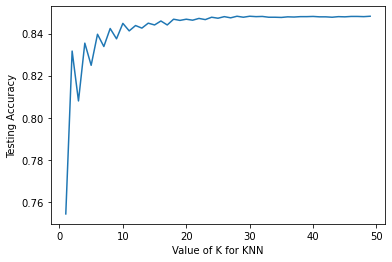

In [61]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.savefig('train_test_split_K_200')

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or not complex enough

## Downsides of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

# Cross-validation

### Review of what we'se seen so far

**Motivation:** Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data

**Alternative idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set change testing accuracy

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [63]:
# create a Python list of feature names
feature_cols = ['loan_amnt_norm', 'int_rate_norm']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['default']

In [64]:
print(X.shape)
print(y.shape)

(42531, 2)
(42531,)


In [65]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8248847926267281


**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

Diagram of **5-fold cross-validation:**

![5-fold cross-validation](cross_validation_diagram.png)

- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation

## Cross-validation recommendations

- For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
# create a Python list of feature names
feature_cols = ['loan_amnt_norm', 'int_rate_norm']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['default']

In [68]:
# K-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=35, scoring='accuracy')
print(scores, type(scores))

[0.82319079 0.81907895 0.80756579 0.83059211 0.81085526 0.83223684
 0.82057613 0.82469136 0.82139918 0.83045267 0.83209877 0.83786008
 0.82139918 0.82386831 0.83868313 0.82716049 0.84115226 0.83209877
 0.82798354 0.83374486 0.82962963 0.82798354 0.8345679  0.83621399
 0.84032922 0.83703704 0.82057613 0.83209877 0.81975309 0.82304527
 0.80082305 0.80823045 0.82057613 0.81069959 0.80658436] <class 'numpy.ndarray'>


Text(0, 0.5, 'Testing Accuracy')

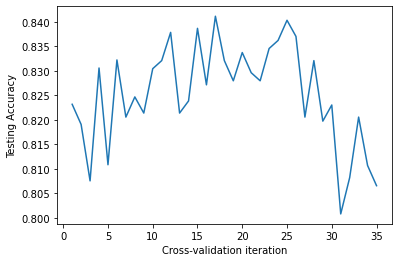

In [69]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(list(range(1,36)), scores)
plt.xlabel('Cross-validation iteration')
plt.ylabel('Testing Accuracy')

In [70]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.8252810459791454


#### Notes: 
- In each iteration of the cross-validation the fraction guessed correctly changes a bit (varies from around 80% to almost 85%)
- Taking the average help to give a more precise estimate of the true out-of-sample prediction accuracy we should expect when new data is fed into the model.

In [71]:
# just to make we are actually using the normalized feature levels!
X.head()

,loan_amnt_norm,int_rate_norm
0,0.1304,0.2728
1,0.0580,0.5138
2,0.0551,0.5498
3,0.2754,0.4210
4,0.0725,0.3792


In [72]:
# search for an optimal value of K for KNN using cross-validation
# in each possible k for the knn model, the code carries out cross validation t

# the running increases a lot for high values of k 
k_range = list(range(1, 26))
# list below stores the clasification accuracy for each k (classification accuracy computed with cross-validation) 
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross validation partitions equal to ten is usually considered to be good enough in practical applications
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7393198318706637, 0.826385639341283, 0.796477947312503, 0.8343326390033485, 0.821048307834587, 0.8397639443868323, 0.8314407894380482, 0.8431967931925815, 0.8387999245202176, 0.8446545987450325, 0.8427736288585695, 0.8463239146105668, 0.8443253640700096, 0.8469587053293834, 0.8458771711353726, 0.8474524744335451, 0.8466060296937995, 0.8475230073497719, 0.8467941930091438, 0.8480872872612611, 0.8470997877435116, 0.847946243537707, 0.8475700882509882, 0.8482518990715479, 0.8477816869996687]


Text(0, 0.5, 'Cross-Validated Accuracy')

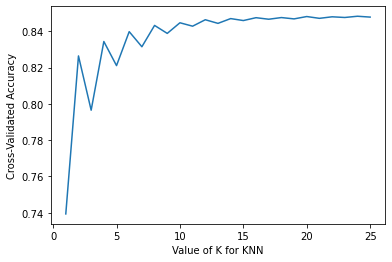

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Cross-validation example: model selection

**Goal:** Compare the best KNN model with logistic regression

In [74]:
# K-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=25)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8477816869996687


In [75]:
# K-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.8487926495868787


In [76]:
y.mean()

0.15120735463544238

## Cross-validation example: feature selection

**Goal**: Select whether the income variable should be included

In [77]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8480872872612611


In [78]:
# here we add income of the borrower as well
feature_cols = ['loan_amnt_norm', 'int_rate_norm','annual_inc_norm']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df['default']

In [79]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8476641118727996


**NOTE:** The income variable does not help to predict default above and beyond what was attained with loan amount and interest rate. 

### What if we test other variables we have?

#### Try others at home to see if you can get a higher classification accuracy. 

Just make sure the units are comparable.

In [80]:
# what options do we have (of) features?
df.columns

Index(['default', 'loan_amnt', 'int_rate', 'annual_inc', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'meet_policy',
       'loan_amnt_norm', 'int_rate_norm', 'annual_inc_norm', 'loan_amnt_std',
       'int_rate_std', 'annual_inc_std'],
      dtype='object')

In [81]:
# suppose I only know whether grade A or not (I dont know the grade, only if A or not!) 
#feature_cols = [INCLUDE YOUR VARIABLES]

# use the list to select a subset of the original DataFrame
#X = df[feature_cols]

# select a Series from the DataFrame
#y = df['default']

In [82]:
# 10-fold cross-validation with the best KNN model
#knn = KNeighborsClassifier(n_neighbors=20)
#print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

### Quiz:

What does the KNN model do when you pass it only one dummy like grade_A for example? What value does it assign to all new loans with grade A? And what does it assign for all new loans that aren't grade A?

## Improvements to cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

<br><br><br><br><br><br><br><br><br><br>

# A note on Linear Regression

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

## Loading and preparing data for machine learning reg

In [83]:
pwd

'/Users/cayruachavesfonseca/Dropbox/CEMFI_TA/css2020/CSS_2020_cay/Basic Python - Tutorials-20200903/tutorial_3'

In [84]:
import pandas as pd
df = pd.read_csv('LoanStats3a.csv',skiprows=1,low_memory=False)

In [85]:
clist = ['int_rate','loan_amnt', 'annual_inc','grade']
df = df[clist]
df.head()

,int_rate,loan_amnt,annual_inc,grade
0,10.65%,"5,000.0000","24,000.0000",B
1,15.27%,"2,500.0000","30,000.0000",C
2,15.96%,"2,400.0000","12,252.0000",C
3,13.49%,"10,000.0000","49,200.0000",C
4,12.69%,"3,000.0000","80,000.0000",B


For the sake of out example, consider the problem of a "smart" customer that wants to know what level of interest rate they should accept or not from a bank when asking for a loan...

- **Target:** the interest rate people with my characteristics tend to get 
- **Features:** loan amount, annual income, grade (my characteristics and the amount I want to borrow)

In [86]:
print(df.count())

int_rate      42535
loan_amnt     42535
annual_inc    42531
grade         42535
dtype: int64


In [87]:
df = df.dropna()
print(df.count())

int_rate      42531
loan_amnt     42531
annual_inc    42531
grade         42531
dtype: int64


**Nice:** all features as well as the outcome have the same number of observations. 

#### Formatting

**Interest rate:** has the percentage sign and it stored as text because of that.

In [88]:
# apply function that transforms the argument's % sign into a empty space 
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace('%',''))
df.head()

,int_rate,loan_amnt,annual_inc,grade
0,10.65,"5,000.0000","24,000.0000",B
1,15.27,"2,500.0000","30,000.0000",C
2,15.96,"2,400.0000","12,252.0000",C
3,13.49,"10,000.0000","49,200.0000",C
4,12.69,"3,000.0000","80,000.0000",B


In [89]:
# apply function that transforms the argument's % sign into a empty space 
df['int_rate'] = df['int_rate'].astype('float')
df.head()

,int_rate,loan_amnt,annual_inc,grade
0,10.6500,"5,000.0000","24,000.0000",B
1,15.2700,"2,500.0000","30,000.0000",C
2,15.9600,"2,400.0000","12,252.0000",C
3,13.4900,"10,000.0000","49,200.0000",C
4,12.6900,"3,000.0000","80,000.0000",B


In [90]:
df['int_rate'].dtype

dtype('float64')

#### Categories

To simplify, I will assume interest depends linearly in grade category

In [91]:
df.grade = pd.Categorical(df.grade)

In [92]:
df['gr_num'] = df.grade.cat.codes + 1

In [93]:
df.head(20)

,int_rate,loan_amnt,annual_inc,grade,gr_num
0,10.6500,"5,000.0000","24,000.0000",B,2
1,15.2700,"2,500.0000","30,000.0000",C,3
2,15.9600,"2,400.0000","12,252.0000",C,3
3,13.4900,"10,000.0000","49,200.0000",C,3
4,12.6900,"3,000.0000","80,000.0000",B,2
5,7.9000,"5,000.0000","36,000.0000",A,1
6,15.9600,"7,000.0000","47,004.0000",C,3
7,18.6400,"3,000.0000","48,000.0000",E,5
8,21.2800,"5,600.0000","40,000.0000",F,6
9,12.6900,"5,375.0000","15,000.0000",B,2


In [94]:
# nices format for displaying
pd.options.display.float_format = '{:,.2f}'.format

df.describe()

,int_rate,loan_amnt,annual_inc,gr_num
count,"42,531.00","42,531.00","42,531.00","42,531.00"
mean,12.17,"11,090.17","69,136.56",2.67
std,3.71,"7,411.14","64,096.35",1.44
min,5.42,500.00,"1,896.00",1.00
25%,9.63,"5,200.00","40,000.00",2.00
50%,11.99,"9,700.00","59,000.00",2.00
75%,14.72,"15,000.00","82,500.00",4.00
max,24.59,"35,000.00","6,000,000.00",7.00


#### Get a random sample of the data to work with.

In [95]:
sample = df.sample(n=400, random_state=2)
sample.describe()

,int_rate,loan_amnt,annual_inc,gr_num
count,400.00,400.00,400.00,400.00
mean,12.09,"10,775.81","68,023.44",2.61
std,3.63,"7,353.96","39,629.93",1.40
min,5.42,"1,000.00","4,000.00",1.00
25%,8.93,"5,000.00","42,000.00",1.00
50%,11.86,"9,700.00","58,500.00",2.00
75%,14.59,"15,000.00","83,050.00",4.00
max,22.06,"35,000.00","264,000.00",7.00


In [96]:
sample.columns

Index(['int_rate', 'loan_amnt', 'annual_inc', 'grade', 'gr_num'], dtype='object')

Transformation of income and loan amount to logs for better interpretation of coefficients. 

In [97]:
import numpy as np
sample.loc[:,'log_loan_amnt'] = np.log(sample['loan_amnt'])
sample.loc[:,'log_income'] = np.log(sample['annual_inc'])

In [98]:
sample.describe()

,int_rate,loan_amnt,annual_inc,gr_num,log_loan_amnt,log_income
count,400.00,400.00,400.00,400.00,400.00,400.00
mean,12.09,"10,775.81","68,023.44",2.61,9.02,10.98
std,3.63,"7,353.96","39,629.93",1.40,0.78,0.56
min,5.42,"1,000.00","4,000.00",1.00,6.91,8.29
25%,8.93,"5,000.00","42,000.00",1.00,8.52,10.65
50%,11.86,"9,700.00","58,500.00",2.00,9.18,10.98
75%,14.59,"15,000.00","83,050.00",4.00,9.62,11.33
max,22.06,"35,000.00","264,000.00",7.00,10.46,12.48


## Visualizing data

#### Is linear regression a good idea?

In [99]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

The command below increases the size of the display window for outputs, that way we can better visualize the scatter plots. 

In [100]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

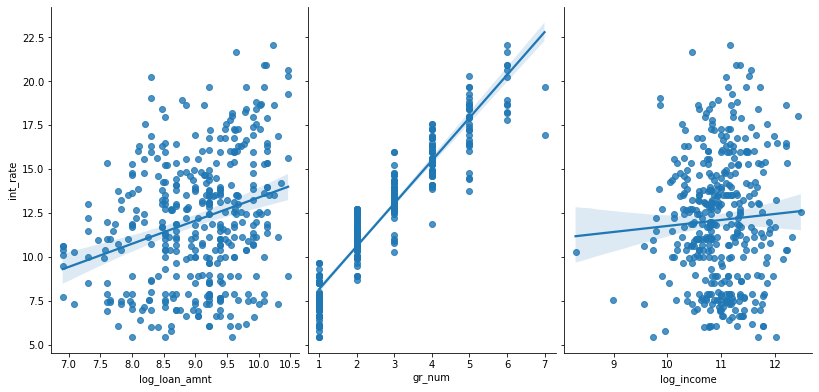

In [101]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(sample, x_vars=['log_loan_amnt','gr_num','log_income'], y_vars='int_rate', 
             height=5.5, aspect=0.7, kind='reg')

## Preparing X and y

In [102]:
# create a Python list of feature names
feature_cols = ['log_loan_amnt','gr_num','log_income']

# use the list to select a subset of the original DataFrame
X = sample[feature_cols]

# print the first 5 rows
X.head()

,log_loan_amnt,gr_num,log_income
24335,10.09,2,11.18
35428,7.60,1,11.16
6378,9.39,1,11.41
41452,8.70,5,10.37
4186,9.62,1,11.08


In [103]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(400, 3)


In [104]:
# select a Series from the DataFrame
y = sample['int_rate']

# print the first 5 values
y.head()

24335    9.99
35428    7.40
6378     6.62
41452   14.43
4186     7.90
Name: int_rate, dtype: float64

In [105]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(400,)


## Splitting X and y into training and testing sets

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [107]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 3)
(300,)
(100, 3)
(100,)


## Linear regression in scikit-learn

In [108]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting model coefficients

In [109]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

5.015406794730592
[ 0.16494523  2.3957242  -0.06372892]


In [110]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('log_loan_amnt', 0.16494523368822203),
 ('gr_num', 2.395724204528283),
 ('log_income', -0.06372892380713346)]

Important notes:

- This is a statement of **association**, not **causation**.
- Examples of bias...

### Making predictions

In [111]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred[0:10]

array([13.0188831 , 10.2936504 , 20.2868269 ,  8.28964412,  8.29946103,
        8.08131184,  8.05969991, 10.7644236 , 10.4515649 , 20.26888932])

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Computing the RMSE

In [112]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.2545451573920436


## Feature selection

Does **Income** even "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [113]:
# create a Python list of feature names
feature_cols = ['log_loan_amnt','gr_num']

# use the list to select a subset of the original DataFrame
X = sample[feature_cols]

# select a Series from the DataFrame
y = sample['int_rate']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.2542207742550693


Does cross-validation tells a different story?

In [114]:
# 10-fold cross-validation with two features (excluding Newspaper)
lm = LinearRegression()
feature_cols = ['log_loan_amnt','gr_num','log_income']
y = sample['int_rate']
X = sample[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.1982319249458957


In [115]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['log_loan_amnt','gr_num']
y = sample['int_rate']
X = sample[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.1966945913738738


The RMSE slightly **decreases** when we removed income from the model, so income is likely to help predicting the interest rates once you already know loan amount and grade. 